# Exercise 7

The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository. The project must be carried out in the groups assigned in class. Use clear and rigorous procedures. Due date: July 18, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)

# Part 1 - DT

## Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [2]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)

In [3]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bikes.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [6]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [7]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [8]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [9]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

It means that in proportion the bikes are mostly use in "workdays"

In [10]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

<AxesSubplot:xlabel='hour'>

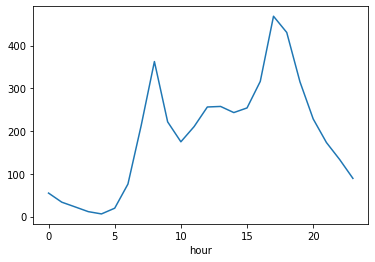

In [11]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

<AxesSubplot:xlabel='hour'>

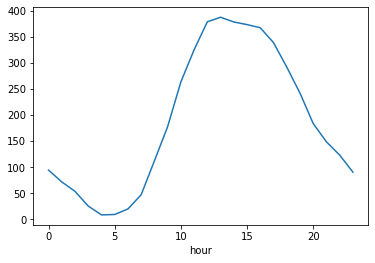

In [12]:
# hourly rental trend for "workingday=0"

bikes_weekends = bikes[bikes["workingday"] == 0]
bikes_weekends.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

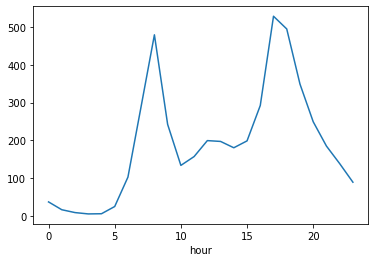

In [13]:
# hourly rental trend for "workingday=1"

bikes_workdays = bikes[bikes["workingday"] == 1]
bikes_workdays.groupby('hour').total.mean().plot()

In [14]:
# combine the two plots

import matplotlib.pyplot as plt

In [15]:
groupby_weekends= bikes_weekends.groupby('hour').total.mean()
df_weekends = pd.DataFrame(groupby_weekends)
df_weekends

,total
hour,
0,94.489655
1,71.910345
2,53.748252
3,25.534722
4,8.544828
5,9.373239
6,19.993103
7,47.268966
8,112.255172


In [16]:
groupby_workdays = bikes_workdays.groupby('hour').total.mean()
df_workdays = pd.DataFrame(groupby_workdays)
df_workdays

,total
hour,
0,36.732258
1,16.003236
2,8.436066
3,4.892734
4,5.363636
5,24.529032
6,102.577419
7,290.690323
8,479.945161


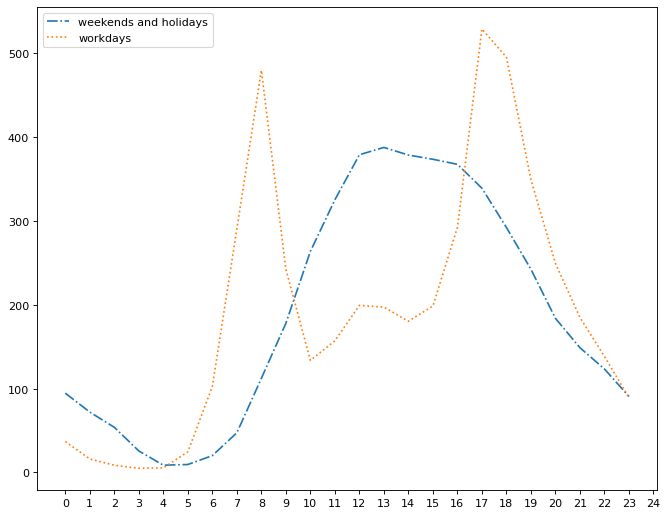

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize =(10, 8), dpi= 80)
plt.plot(df_weekends,label = "weekends and holidays", linestyle = "-.") 
plt.plot(df_workdays, label = "workdays", linestyle = ":")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.legend()
plt.show()

Write about your findings: It is clear that the trend is diferent between the weekend-holidays and workingdays. The plot shows us that in the case of the workdays the quantity is higher in the morning and afternoon hours and this situation could be explain by the usual 8-5 working office hours. On the other side the weekends and holidays have their higher point at mid day, situation that may be explain by the "recreational bikers" that use the bikes for sport and pleasure.  

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()


In [19]:
y = bikes["total"]
X = bikes[["hour","workingday"]]


In [20]:
reg_bikes = reg.fit(X,y)

In [21]:
print('coefficients: \n', reg_bikes.coef_)
print('intercept: \n', reg_bikes.intercept_)


coefficients: 
 [10.49206282  4.07248627]
intercept: 
 67.70595026191576


Interpretation: since both coefficients of the independence variables "x" are positive, it will indicate that wile "x" variables increase, the mean of the dependent value "y" will tend to increase. the intercept is simple the expect value according to the value coefficients.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [22]:
max_depth = None
num_pct = 6
max_features = None
min_gain=0.001

In [23]:
j = 1
print(X.columns[j])

workingday


In [29]:
# Split the variable in num_ctp points
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([0., 1.])

In [30]:
k = 5

#### Gini

In [33]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

#### Putting all in a function

In [34]:
def gini_impurity(X_col, y, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

#### Test all splits on all features

In [35]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [36]:
j, split, gain = best_split(X, y, 5)
j, split, gain

(0, 8.0, 18268.811823533004)

In [37]:
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [38]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3594, 7292)

In [39]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 55.437673900946024, 258.6715578716402)

#### Recursively grow the tree

In [40]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=6):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [45]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=6)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 6.0],
 'n_samples': 10886,
 'gain': 18120.937290485905,
 'sl': {'y_pred': 1,
  'y_prob': 25.15934475055845,
  'level': 1,
  'split': -1,
  'n_samples': 2684,
  'gain': 382.8088308604629},
 'sr': {'y_pred': 1,
  'y_prob': 245.96538274012676,
  'level': 1,
  'split': -1,
  'n_samples': 8202,
  'gain': 5191.395303591984}}

#### Prediction

In [46]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [47]:
tree_predict(X, tree)

array([1., 1., 1., ..., 1., 1., 1.])

#### Sklearn

In [52]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packag

Text(0, 0.5, 'Accuracy')

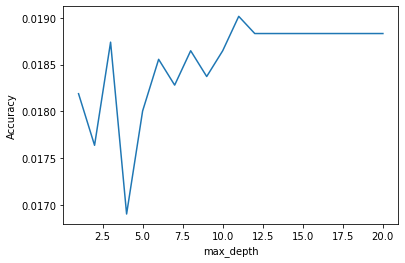

In [53]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [54]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.01901543847566575, 11)

In [55]:
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [56]:
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


count    10.000000
mean      0.016903
std       0.004044
min       0.006428
25%       0.016544
50%       0.017455
75%       0.019743
max       0.020221
dtype: float64

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [58]:
clf = DecisionTreeClassifier(max_depth = None, random_state = 1)
tree_bikes = clf.fit(X,y)

In [59]:
print(tree_bikes.tree_.max_depth)

12


In [60]:
help(clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

In [61]:
print(tree_bikes.tree_.node_count)

95


# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [62]:
df = pd.read_csv('mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [63]:
df.shape

(6000, 61)

In [64]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [65]:
y.mean()

0.5

In [66]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
models = {"lr" : LogisticRegression(),
         "Dt" : DecisionTreeClassifier()}

In [69]:
for model in models.keys():
    models[model].fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
y_pred = pd.DataFrame(index= y_test.index, columns = models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [71]:
y_pred

,lr,Dt
1483,1,0
2185,0,0
2520,1,1
3721,1,0
3727,0,0
...,...,...
3077,0,1
5166,0,1
2227,0,1
5684,0,0


In [72]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

metrics.accuracy_score(y_pred['lr'],y_test)

0.614

In [73]:
metrics.accuracy_score(y_pred['Dt'], y_test)

0.5513333333333333

In [74]:
from sklearn.metrics import f1_score
metrics.f1_score(y_pred['lr'],y_test)

0.6106254203093476

In [75]:
metrics.f1_score(y_pred['Dt'],y_test)

0.5498327759197325

# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [76]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier

In [77]:
n_estimators = 100
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [ ]:
#samples

In [78]:
bag_cla = BaggingClassifier(DecisionTreeClassifier(),max_samples = 300, bootstrap = True, oob_score = True, random_state = 1)
bag_cla.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=300,
                  oob_score=True, random_state=1)

In [79]:
DecisionTreeClassifier()._estimator_type = "Classifier"

In [80]:
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees_none = {}
for i in range(n_estimators):
    trees_none[i] = DecisionTreeClassifier(max_depth=None, random_state=seeds[i])
    trees_none[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [81]:
# Predict 
y_pred_dfnone = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_dfnone.iloc[:, i] = trees_none[i].predict(X_test)

y_pred_dfnone.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2185,1,1,1,1,0,1,1,1,1,0,...,1,0,1,1,0,1,1,1,1,1
2520,1,0,0,0,1,0,1,1,0,0,...,1,1,1,1,1,0,1,0,1,1
3721,1,1,1,0,1,0,1,1,1,1,...,1,1,0,1,0,1,0,1,1,1
3727,0,0,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees_two = {}
for i in range(n_estimators):
    trees_two[i] = DecisionTreeClassifier(max_depth=2, random_state=seeds[i])
    trees_two[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [83]:
# Predict 
y_pred_dftwo = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_dftwo.iloc[:, i] = trees_two[i].predict(X_test)

y_pred_dftwo.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
LogisticRegression()._estimator_type = "Classifier"

In [85]:
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees_lr = {}
for i in range(n_estimators):
    trees_lr[i] = LogisticRegression(max_iter = 10000, random_state=seeds[i])
    trees_lr[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [86]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(LogisticRegression())

In [87]:
# Predict 
y_pred_dflr = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_dflr.iloc[:, i] = trees_lr[i].predict(X_test)

y_pred_dflr.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [88]:
y_prednone = (y_pred_dfnone.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

from sklearn import metrics
metrics.f1_score(y_prednone, y_test), metrics.accuracy_score(y_prednone, y_test)


(0.6506493506493507, 0.6413333333333333)

In [89]:
y_predtwo = (y_pred_dftwo.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

from sklearn import metrics
metrics.f1_score(y_predtwo, y_test), metrics.accuracy_score(y_predtwo, y_test)

(0.6448598130841121, 0.6453333333333333)

In [90]:
y_predlr = (y_pred_dflr.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

from sklearn import metrics
metrics.f1_score(y_predlr, y_test), metrics.accuracy_score(y_predlr, y_test)

(0.6148555708390646, 0.6266666666666667)

In [91]:
bag_cla.fit(X_train, y_train)
y_pred = bag_cla.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6039102099927589, 0.6353333333333333)

# Exercise 7.9

Estimate the probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

models = {'lr': LinearRegression(),
          'dt': DecisionTreeRegressor(),
          'nb': GaussianNB(),
          'kn': KNeighborsRegressor()}

In [101]:
# Train all the models
for model in models.keys():
    models[model].fit(X_train, y_train)

In [103]:
# predict test for each model
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [104]:
# Evaluate each model
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

lr 0.46807422406148236
dt 0.6782329983125268
nb 0.6643292356454993
kn 0.51856211456938


# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [92]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.642384105960265, 0.64)

In [93]:
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [94]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6513761467889909, 0.6453333333333333)

# Exercise 7.11

Estimate the probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [109]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [111]:
metrics.accuracy_score(y_pred['lr'],y_test)

In [112]:
metrics.accuracy_score(y_pred['Dt'], y_test)

In [113]:
metrics.f1_score(y_pred['lr'],y_test)

In [114]:
metrics.f1_score(y_pred['Dt'],y_test)

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [95]:
from sklearn.linear_model import LogisticRegressionCV

In [96]:
y_pred_all_ = np.zeros((X_test.shape[0], bag_cla.n_estimators))
X_train_3 = np.zeros((X_train.shape[0], bag_cla.n_estimators))

for i in range(bag_cla.n_estimators):

    X_train_3[:, i] = bag_cla.estimators_[i].predict(X_train)
    y_pred_all_[:, i] = bag_cla.estimators_[i].predict(X_test)
    
lr = LogisticRegressionCV(cv=5)
lr.fit(X_train_3, y_train)

y_pred = lr.predict(y_pred_all_)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6451187335092348, 0.6413333333333333)